In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('delta_R')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 102.5 seconds


In [4]:
c = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
c = applyCut(c, 'pt_jet > 4', 'pt_jet > 4')
c = applyCut(c, '0.1 < y < 0.85', '0.1 < y < 0.85')
c = fixPhi(c, 'photon')
c = applyCut(c, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 110644  fraction kept: 82.4


In [5]:
c1 = applyCut(c, '5 < pt_electron < 10', '5 < pt_electron < 10')
c2 = applyCut(c, '10 < pt_electron < 20', '10 < pt_electron < 20')
c3 = applyCut(c, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 66281  fraction kept: 59.9
10 < pt_electron < 20 14383  fraction kept: 13.0
20 < pt_electron < 35 967  fraction kept: 0.9


In [19]:
def plot_r(df_array, var_array, label_array, color_array):
    for i in range(0,len(var_array)):
        fig = plt.hist(df_array[i][var_array[i]], label=label_array[i], range=(0,1.1), bins=55, histtype='step', fill=True, alpha=0.5, stacked=True, normed=True, color=color_array[i], linewidth=2)
    return fig

In [7]:
files = ["$HOME/EIC/output/105.root"]
a = getData(files)


Processed $HOME/EIC/output/105.root in 100.8 seconds


In [8]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, '0.1 < y < 0.85', '0.1 < y < 0.85')
d = fixPhi(d, 'photon')
d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 110644  fraction kept: 82.4


In [9]:
d1 = applyCut(d, '5 < pt_electron < 10', '5 < pt_electron < 10')
d2 = applyCut(d, '10 < pt_electron < 20', '10 < pt_electron < 20')
d3 = applyCut(d, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 66281  fraction kept: 59.9
10 < pt_electron < 20 14383  fraction kept: 13.0
20 < pt_electron < 35 967  fraction kept: 0.9


In [10]:
files = ["$HOME/EIC/output/106.root"]
a = getData(files)


Processed $HOME/EIC/output/106.root in 95.0 seconds


In [11]:
e = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
e = applyCut(e, 'pt_jet > 4', 'pt_jet > 4')
e = applyCut(e, '0.1 < y < 0.85', '0.1 < y < 0.85')
e = fixPhi(e, 'photon')
e = applyCut(e, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
e.eval('nu = 0.533*Q2/x',inplace=True)

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 110644  fraction kept: 82.4


In [12]:
e1 = applyCut(e, '5 < pt_electron < 10', '5 < pt_electron < 10')
e2 = applyCut(e, '10 < pt_electron < 20', '10 < pt_electron < 20')
e3 = applyCut(e, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 66281  fraction kept: 59.9
10 < pt_electron < 20 14383  fraction kept: 13.0
20 < pt_electron < 35 967  fraction kept: 0.9


In [13]:
print np.mean(keepOneJet(e1)['x']), np.mean(keepOneJet(e2)['x']), np.mean(keepOneJet(e3)['x'])


Remove extra jets 66212  fraction kept: 99.9
0.03789028 
Remove extra jets 14302  fraction kept: 99.4
0.13459116 
Remove extra jets 964  fraction kept: 99.7
0.35058257


In [14]:
print np.mean(keepOneJet(e1)['nu']), np.mean(keepOneJet(e2)['nu']), np.mean(keepOneJet(e3)['nu'])


Remove extra jets 66212  fraction kept: 99.9
1162.4923 
Remove extra jets 14302  fraction kept: 99.4
1183.565 
Remove extra jets 964  fraction kept: 99.7
1470.9365


/home/youqi/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


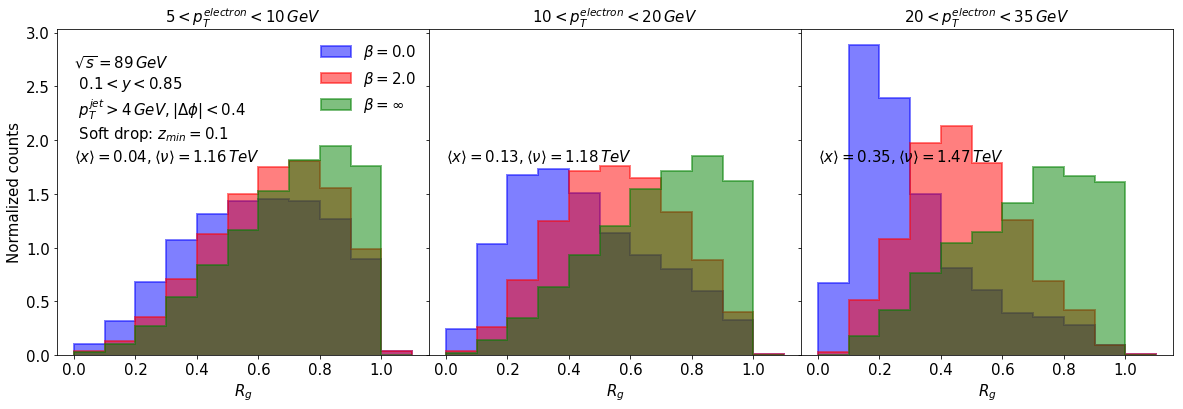

In [15]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_r([c1,d1,e1], ['delta_R','delta_R','delta_R'], [r'$\beta=0.0$',r'$\beta=2.0$',r'$\beta=\infty$'], ['b','r','g'])
plt.xlabel('$R_g$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0, 1.8, r'$\langle x \rangle = 0.04, \langle \nu \rangle = 1.16 \, TeV$',fontsize=15)
plt.text(0, 2.0,'$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, GeV, |\Delta \phi| < 0.4$ \n Soft drop: $z_{min} = 0.1$', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 \, GeV$', fontsize=15)

ax2 = plt.subplot(132, sharey=ax1)
plot_r([c2,d2,e2], ['delta_R','delta_R','delta_R'], [r'$\beta=0.0$',r'$\beta=2.0$',r'$\beta=1000.0$'], ['b','r','g'])
plt.xlabel('$R_g$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(0, 1.8, r'$\langle x \rangle = 0.13, \langle \nu \rangle = 1.18 \, TeV$',fontsize=15)
plt.title('$10 < p_T^{electron} < 20 \, GeV$', fontsize=15)

ax3 = plt.subplot(133, sharey=ax1)
plot_r([c3,d3,e3], ['delta_R','delta_R','delta_R'], [r'$\beta=0.0$',r'$\beta=2.0$',r'$\beta=1000.0$'], ['b','r','g'])
plt.xlabel('$R_g$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.text(0, 1.8, r'$\langle x \rangle = 0.35, \langle \nu \rangle = 1.47 \, TeV$',fontsize=15)
plt.title('$20 < p_T^{electron} < 35 \, GeV$', fontsize=15)

plt.savefig('images/deltar_1.pdf', bbox_inches='tight')

In [23]:
table = np.loadtxt('uploads/EIC_quark.txt',skiprows=1)

In [24]:
R = table[:,0]
qhat0 = table[:,1]
qhat02 = table[:,2]
qhat08 = table[:,3]

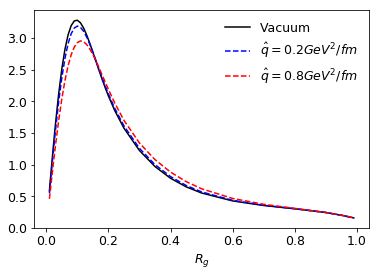

In [25]:
plt.plot(R,qhat0,color='black',label='Vacuum')
plt.plot(R,qhat02,'b--', label='$\hat{q}=0.2GeV^2/fm$')
plt.plot(R,qhat08,'r--', label='$\hat{q}=0.8GeV^2/fm$')
plt.xlabel('$R_g$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

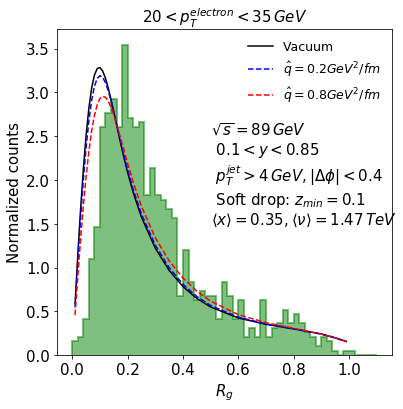

In [27]:
fig = plt.figure(figsize=(6,6))
plt.plot(R,qhat0,color='black',label='Vacuum')
plt.plot(R,qhat02,'b--', label='$\hat{q}=0.2GeV^2/fm$')
plt.plot(R,qhat08,'r--', label='$\hat{q}=0.8GeV^2/fm$')
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')
plot_r([c3], ['delta_R'], [r'$\beta=0.0$'], ['g'])
plt.xlabel('$R_g$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.5, 1.5, r'$\langle x \rangle = 0.35, \langle \nu \rangle = 1.47 \, TeV$',fontsize=15)
plt.text(0.5, 1.7,'$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, GeV, |\Delta \phi| < 0.4$ \n Soft drop: $z_{min} = 0.1$', fontsize=15)
plt.title('$20 < p_T^{electron} < 35 \, GeV$', fontsize=15)

plt.savefig('images/deltar_3.pdf', bbox_inches='tight')

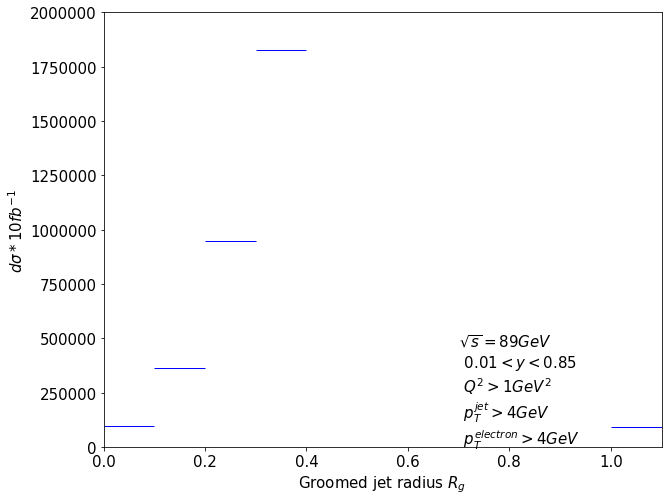

In [27]:
plt.figure(figsize=(10,8))
plot1d(d, 'delta_R', 0, 1.1, 0, 2e6, 0.1, 'Groomed jet radius $R_g$', 'linear', '', 'delta_R')
plt.text(0.7, 0, '$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $Q^2 > 1 GeV^2$ \n $p_T^{jet} > 4 GeV$ \n $p_T^{electron} > 4 GeV$', fontsize = 15)
plt.savefig('images/delta_R.pdf', bbox_inches='tight')